# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv("C:\\Users\\Saabik Ahamed\\Downloads\\archive (7)\\London.csv")

In [3]:
df.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,Location,Postal Code
0,Queens Road,1675000,House,2716,5,5,Wimbledon,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,Clerkenwell,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,Putney,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,Putney,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,Putney,SW15 1PL


In [4]:
df.describe()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms
count,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,1.877659e+06,1766.850278,3.118348,3.118348
std,2.324242e+06,1469.490065,1.539408,1.539408
min,1.800000e+05,274.000000,0.000000,0.000000
25%,7.250000e+05,840.000000,2.000000,2.000000
50%,1.200000e+06,1311.500000,3.000000,3.000000
75%,2.250000e+06,2219.000000,4.000000,4.000000
max,3.975000e+07,15405.000000,10.000000,10.000000


# Training a Linear Regression Model

In [5]:
X = df[['Price','Area in sq ft',
       'No. of Bedrooms', 'No. of Bathrooms']]
y = df['Price']

# Split Data Into Train, Test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the        LinearRegression Model 

In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
rm = LinearRegression()


In [9]:
rm.fit(X_train, y_train)

LinearRegression()

In [10]:
print(rm.intercept_)

-4.656612873077393e-10


In [11]:
coeff_df = pd.DataFrame(rm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Price,1.000000e+00
Area in sq ft,-3.528684e-14
No. of Bedrooms,7.103909e-12
No. of Bathrooms,7.103909e-12


# Predictions from our Linear Regression Model

In [12]:
predictions = rm.predict(X_test)

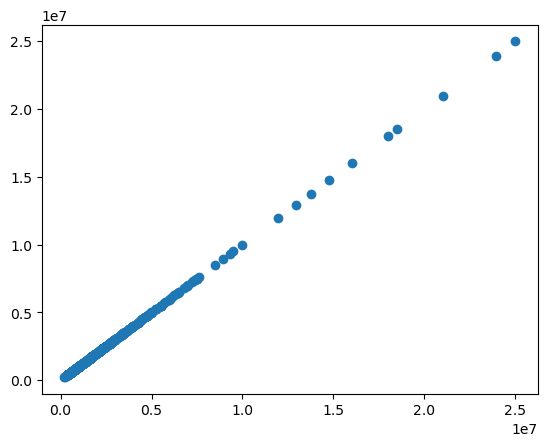

In [13]:
plt.scatter(y_test,predictions)

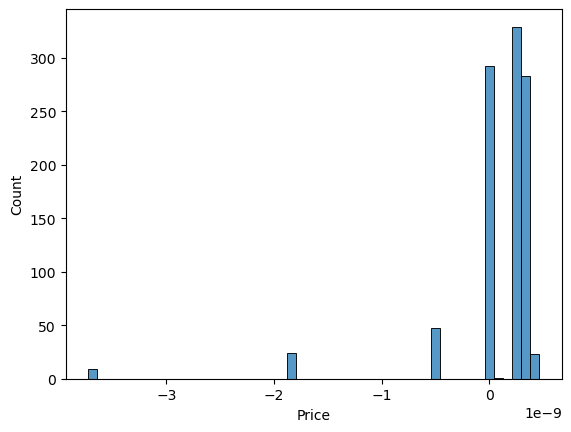

In [14]:
sns.histplot((y_test-predictions),bins=50);

# Regression Evaluation Metrics

In [15]:
from sklearn import metrics

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.8304052576127034e-10
MSE: 2.725303298476805e-19
RMSE: 5.220443753625553e-10
